In [1]:
# importing libraries and methods
import random
import numpy as np 
import pandas as pd
import seaborn as sns
from mord import LogisticIT
import matplotlib.pyplot as plt
from dmba.metric import AIC_score
from sklearn import preprocessing
from dmba import regressionSummary
import statsmodels.formula.api as sm
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from dmba import classificationSummary, gainsChart, liftChart
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [2]:
# reading data and storing it in a pandas dataframe
churn_data=pd.read_csv('churn_prediction.csv')

In [3]:
# checking data dimensions
churn_data.shape

(28382, 21)

In [4]:
# checking the data type of all columns
churn_data.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

In [7]:
# manually exploring data
churn_data.sample(40)

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
18348,19578,1599,16,Female,0.0,student,334.0,2,1870,102.0,...,2268.11,2268.11,2418.63,0.03,0.03,0.03,0.03,2268.11,2268.11,1
13432,14338,1407,40,Male,0.0,salaried,146.0,3,2841,14.0,...,20000.47,2875.25,1138.59,1429.04,0.47,2143.33,0.47,1232.63,4175.13,1
20784,22171,3055,44,Male,0.0,salaried,1232.0,2,148,3.0,...,21192.49,25612.17,19835.67,371.81,16406.31,28571.67,35714.53,23191.61,28254.81,0
24267,25895,1041,35,Male,1.0,salaried,834.0,2,718,NaN,...,3515.22,3304.01,3137.66,0.47,0.47,0.47,0.47,3515.22,3238.72,0
11117,11883,1009,35,Female,0.0,self_employed,NaN,2,373,114.0,...,5069.03,2580.89,707.24,0.49,0.49,37238.24,1587.33,3188.74,2814.43,0
3330,3549,2635,38,Male,2.0,salaried,234.0,2,1098,13.0,...,7058.09,5110.16,11014.98,13.66,4.36,1516.40,1287.25,5990.78,5288.06,0
12171,12993,1254,40,Male,NaN,self_employed,102.0,3,113,70.0,...,1671.89,1667.93,1425.04,0.20,0.20,105.57,62.71,1583.77,1683.99,0
3059,3261,1497,65,Female,4.0,self_employed,1232.0,3,1797,27.0,...,2976.57,3002.92,2421.76,32.13,32.20,3.41,74.84,3004.30,3031.41,0
2834,3021,993,36,Female,0.0,salaried,1076.0,3,2802,131.0,...,1473.87,1443.81,1488.05,0.07,0.07,178.61,0.07,1386.16,1473.87,0
8081,8609,3180,86,Male,0.0,self_employed,1096.0,2,1365,NaN,...,2734.89,2734.89,2717.57,0.19,0.19,0.19,0.19,2734.89,2734.89,0


In [9]:
# counting the number of missing values in the data
churn_data.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5]),
 [Text(0.5, 0, 'customer_id'),
  Text(1.5, 0, 'vintage'),
  Text(2.5, 0, 'age'),
  Text(3.5, 0, 'gender'),
  Text(4.5, 0, 'dependents'),
  Text(5.5, 0, 'occupation'),
  Text(6.5, 0, 'city'),
  Text(7.5, 0, 'customer_nw_category'),
  Text(8.5, 0, 'branch_code'),
  Text(9.5, 0, 'days_since_last_transaction'),
  Text(10.5, 0, 'current_balance'),
  Text(11.5, 0, 'previous_month_end_balance'),
  Text(12.5, 0, 'average_monthly_balance_prevQ'),
  Text(13.5, 0, 'average_monthly_balance_prevQ2'),
  Text(14.5, 0, 'current_month_credit'),
  Text(15.5, 0, 'previous_month_credit'),
  Text(16.5, 0, 'current_month_debit'),
  Text(17.5, 0, 'previous_month_debit'),
  Text(18.5, 0, 'current_month_balance'),
  Text(19.5, 0, 'previous_month_balance'),
  Text(20.5, 0, 'churn')])

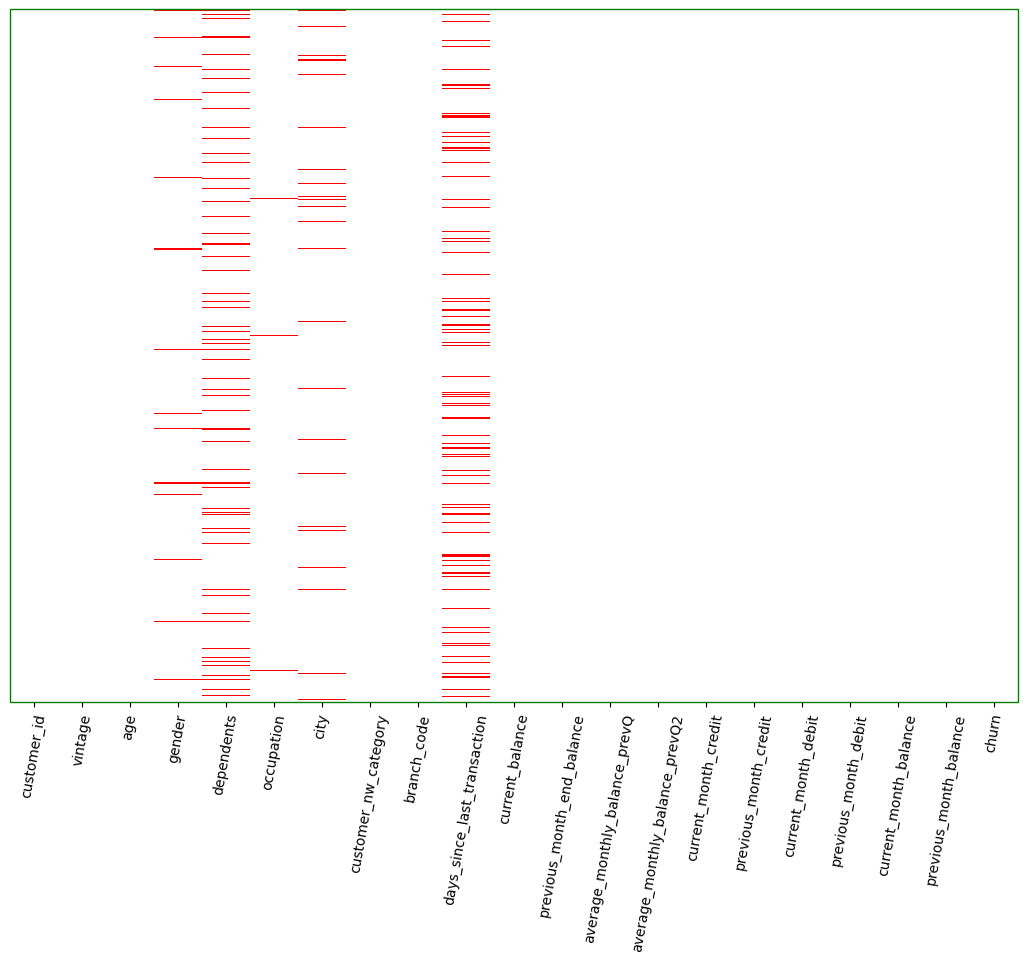

In [10]:
# creating a missing values heatmap using seaborn and numpy libraries
naInfo = np.zeros(churn_data.shape)
naInfo[churn_data.isna().values] = 1
naInfo = pd.DataFrame(naInfo, columns=churn_data.columns)
fig, ax = plt.subplots()
fig.set_size_inches(13, 9)
ax = sns.heatmap(naInfo, vmin=0, vmax=1, cmap=["white", "red"], cbar=False, ax=ax)
ax.set_yticks([])
# draw frame around figure
rect = plt.Rectangle((0, 0), naInfo.shape[1], naInfo.shape[0], linewidth=1,
edgecolor='green', facecolor='none')
rect = ax.add_patch(rect)
rect.set_clip_on(False)
plt.xticks(rotation=80)

<Axes: >

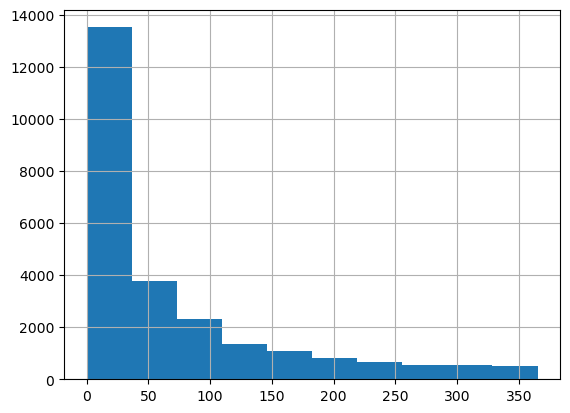

In [11]:
# histogram to see distribution of days_since_last_transaction variable
churn_data['days_since_last_transaction'].hist()

<Axes: >

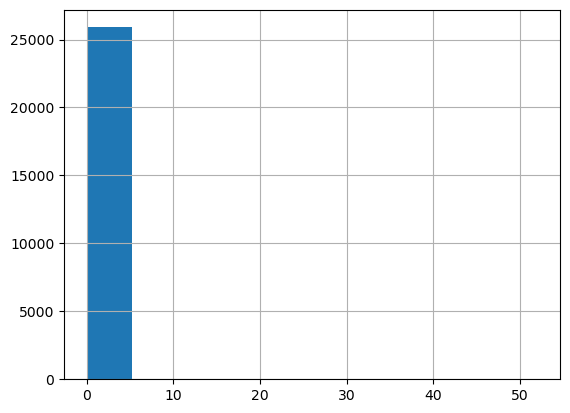

In [12]:
# histogram to see distribution of dependents variable
churn_data['dependents'].hist()

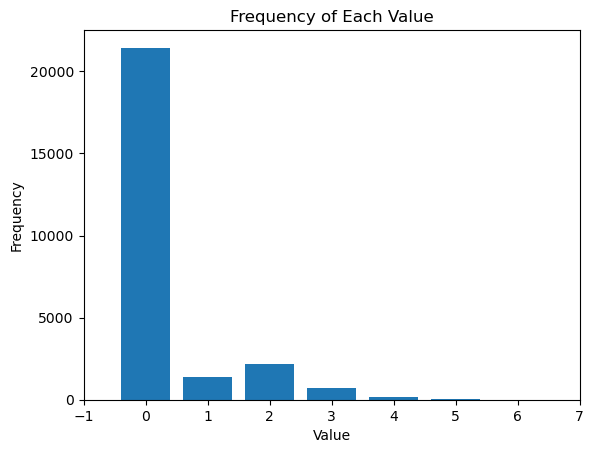

In [16]:
# rescaling histogram to better analyse distribution of dependents variable
value_counts = churn_data['dependents'].value_counts()
value_counts = value_counts.sort_index()
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Frequency of Each Value')
plt.xlim(-1,7)
plt.show()

In [17]:
# checking for unique values in dependents variable
dep=churn_data['dependents'].unique().tolist()
df = pd.DataFrame(dep)
df

,0
0,0.0
1,NaN
2,2.0
3,3.0
4,1.0
5,7.0
6,4.0
7,6.0
8,5.0
9,9.0


In [110]:
# checking for mean, standard deviation and more in different variables
churn_data.describe()

,vintage,age,dependents,days_since_last_transaction,current_balance,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,churn,gender_Female,gender_Male,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student,customer_nw_category_1,customer_nw_category_2,customer_nw_category_3
count,28342.000000,28342.000000,28342.000000,28342.000000,2.834200e+04,2.834200e+04,2.834200e+04,2.834200e+04,2.834200e+04,28342.000000,28342.000000,28342.000000,28342.000000,28342.000000,28342.000000,28342.000000,28342.000000,28342.000000,28342.000000,28342.000000
mean,2366.056665,48.214487,0.309929,62.012243,7.385330e+03,3.436786e+03,3.264769e+03,3.660958e+03,3.341497e+03,0.185343,0.406429,0.593571,0.001411,0.071555,0.236857,0.617317,0.072860,0.130936,0.512914,0.356150
std,1610.482836,17.813016,0.796892,84.232437,4.262834e+04,7.712571e+04,2.970948e+04,5.202186e+04,2.431741e+04,0.388583,0.491175,0.491175,0.037542,0.257754,0.425161,0.486050,0.259911,0.337337,0.499842,0.478869
min,180.000000,1.000000,0.000000,0.000000,-5.503960e+03,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1122.000000,36.000000,0.000000,6.000000,1.784750e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2021.000000,46.000000,0.000000,24.000000,3.281555e+03,6.100000e-01,6.300000e-01,9.151000e+01,1.099600e+02,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,3177.000000,60.000000,0.000000,83.000000,6.637700e+03,7.073250e+02,7.503950e+02,1.357743e+03,1.357525e+03,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,12899.000000,90.000000,9.000000,365.000000,5.905904e+06,1.226985e+07,2.361808e+06,7.637857e+06,1.414168e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
# checking for outliers in previous_month_credit column
prev=churn_data[churn_data['previous_month_credit']>=500000]
prev=prev['previous_month_credit'].unique().tolist()
sorted(prev)

[500214.54,
 512924.02,
 546463.84,
 555100.44,
 566428.7,
 630389.61,
 713571.69,
 819764.11,
 825646.74,
 825969.46,
 865714.43,
 1413436.47,
 1447086.21,
 1971436.45,
 2361808.29]

In [21]:
# checking for outliers in age column
ag=churn_data[churn_data['age']>=80]
ag=ag['age'].unique().tolist()
sorted(ag)

[80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90]

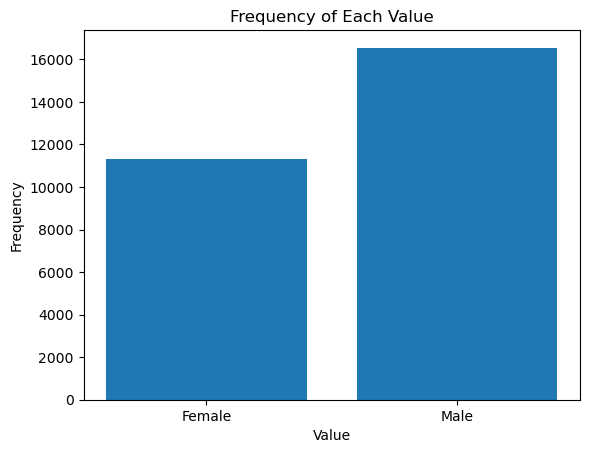

In [22]:
# checking the male to female ratio in the data
value_counts = churn_data['gender'].value_counts()
value_counts = value_counts.sort_index()
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Frequency of Each Value')
plt.show()

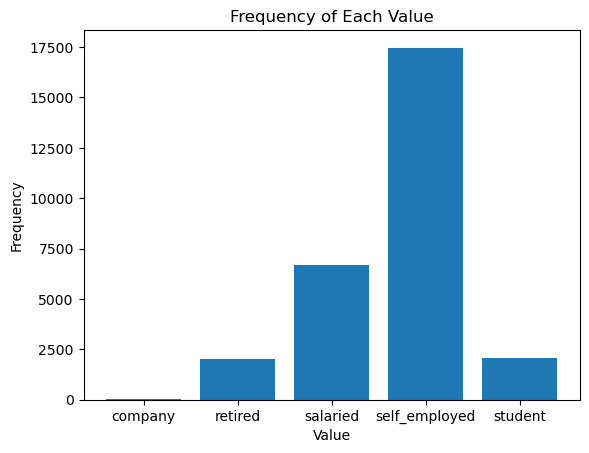

In [23]:
# checking the total counts for different values in occupation variable
value_counts = churn_data['occupation'].value_counts()
value_counts = value_counts.sort_index()
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Frequency of Each Value')
plt.show()

In [26]:
# checking to see if branch_code variable can be used to impute missing city values
filtered_df = churn_data[churn_data['branch_code'] ==1892]
filtered_df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
3811,4063,1705,27,Male,0.0,salaried,NaN,2,1892,45.0,...,9649.36,9059.49,8826.39,0.30,1136.01,0.30,0.30,9649.36,9343.14,0
5796,6177,1383,33,Female,0.0,self_employed,1318.0,2,1892,259.0,...,7160.78,7160.78,7124.24,0.54,0.54,0.54,0.54,7160.78,7160.78,0
8911,9507,1993,43,Female,0.0,self_employed,1318.0,3,1892,32.0,...,227.54,3381.64,535.09,0.04,550.04,0.04,7321.47,206.54,2833.07,1
10648,11374,1678,54,Female,0.0,self_employed,NaN,3,1892,206.0,...,2312.03,2342.68,2922.93,0.67,0.67,0.67,0.67,2273.96,2342.74,0
11731,12529,2068,43,Male,2.0,self_employed,NaN,3,1892,88.0,...,2141.74,2194.55,1740.97,0.10,0.10,218.01,341.67,1952.83,2190.67,0


In [29]:
# imputing nan values of numpy library to all missing data
churn_data=churn_data.fillna(value=np.nan)

In [30]:
# imputing 0 for missing values in dependents column 
churn_data['dependents']=churn_data['dependents'].fillna(value=0)

In [31]:
# replacing outliers in dependents column with 0
for index, row in churn_data.iterrows():
    if row['dependents'] >9:
        churn_data.at[index, 'dependents'] = 0

In [32]:
# checking final values in dependents column
dep=churn_data['dependents'].unique().tolist()
df = pd.DataFrame(dep)
df

,0
0,0.0
1,2.0
2,3.0
3,1.0
4,7.0
5,4.0
6,6.0
7,5.0
8,9.0
9,8.0


In [111]:
# strong the mode for days_since_last_transaction variable
days_mode = churn_data['days_since_last_transaction'].mode()

In [35]:
# replacing missing values in days_since_last_transaction column with the column mode
churn_data['days_since_last_transaction'] =churn_data['days_since_last_transaction'].fillna(value=int(days_mode))

In [37]:
# checking number of males and females in the data
churn_data['gender'].value_counts()

Male      16548
Female    11309
Name: gender, dtype: int64

In [38]:
# creating a list that has the same ratio of males to females as the entire dataset 
genders=["Male","Male","Male","Female","Female"]

In [39]:
# randomly picking values from genders list and imputing missing values in the gender column
for index, row in churn_data.iterrows():
    if pd.isnull(row['gender']):
        churn_data.at[index, 'gender'] = random.choice(genders)

In [40]:
# number of males and females in the dataset after imputation
churn_data['gender'].value_counts()

Male      16852
Female    11530
Name: gender, dtype: int64

In [41]:
# checking the count represented by different occupations in the data
churn_data['occupation'].value_counts()

self_employed    17476
salaried          6704
student           2058
retired           2024
company             40
Name: occupation, dtype: int64

In [42]:
# creating a list representing the distribution of differents occupations in data ignoring 'retired' values 
occupations=["self_employed","self_employed","self_employed","self_employed","self_employed","self_employed","self_employed"
            ,"self_employed","salaried","salaried","salaried","student","retired"]

In [43]:
# randomly picking values from occupations list and imputing missing values for occupation variable
for index, row in churn_data.iterrows():
    if pd.isnull(row['occupation']):
        churn_data.at[index, 'occupation'] = random.choice(occupations)

In [44]:
# checking number of different occupations after imputation
churn_data['occupation'].value_counts()

self_employed    17525
salaried          6722
student           2066
retired           2029
company             40
Name: occupation, dtype: int64

In [46]:
# creating a list of unique combinations of city and the most present branch code for specific cities
# with in data to use in imputing missing city values
branch_modes = {}
for index, row in churn_data.iterrows():
    branch_code = row['branch_code']
    city = row['city']
    
    if not pd.isna(city):
        if branch_code not in branch_modes:
            branch_modes[branch_code] = city
        else:
            branch_modes[branch_code] = city if churn_data['city'].value_counts()[city] > churn_data['city'].value_counts()[branch_modes[branch_code]] else branch_modes[branch_code]
for index, row in churn_data.iterrows():
    branch_code = row['branch_code']
    city = row['city']
    
    if pd.isna(city):
        churn_data.at[index, 'city'] = branch_modes.get(branch_code, np.nan)

In [47]:
# dropping customer_id column
churn_data=churn_data.drop('customer_id',axis=1)

In [48]:
# dropping remaining few records with null values
churn_data=churn_data.dropna()

In [49]:
# checking if dataset has any missing values left
churn_data.isnull().sum()

vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
dtype: int64

C:\Users\shiva\AppData\Local\Temp\ipykernel_19392\2776840818.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=churn_data.corr()


<Axes: >

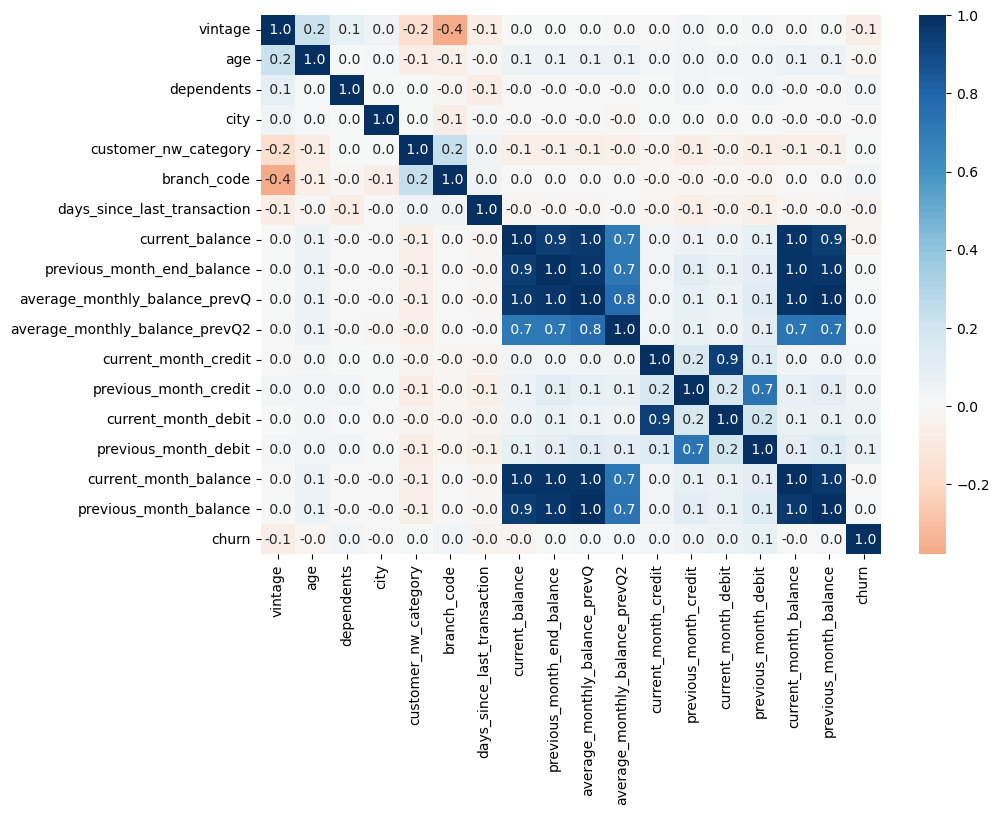

In [51]:
# creating a correlation heatmap using seaborn to find highly correlated columns
corr=churn_data.corr()
fig, ax =plt.subplots()
fig.set_size_inches(10,7)
sns.heatmap(corr, annot =True, fmt =" .1f", cmap ="RdBu", center =0, ax=ax)

C:\Users\shiva\AppData\Local\Temp\ipykernel_19392\616871278.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=corr_d.corr()


<Axes: >

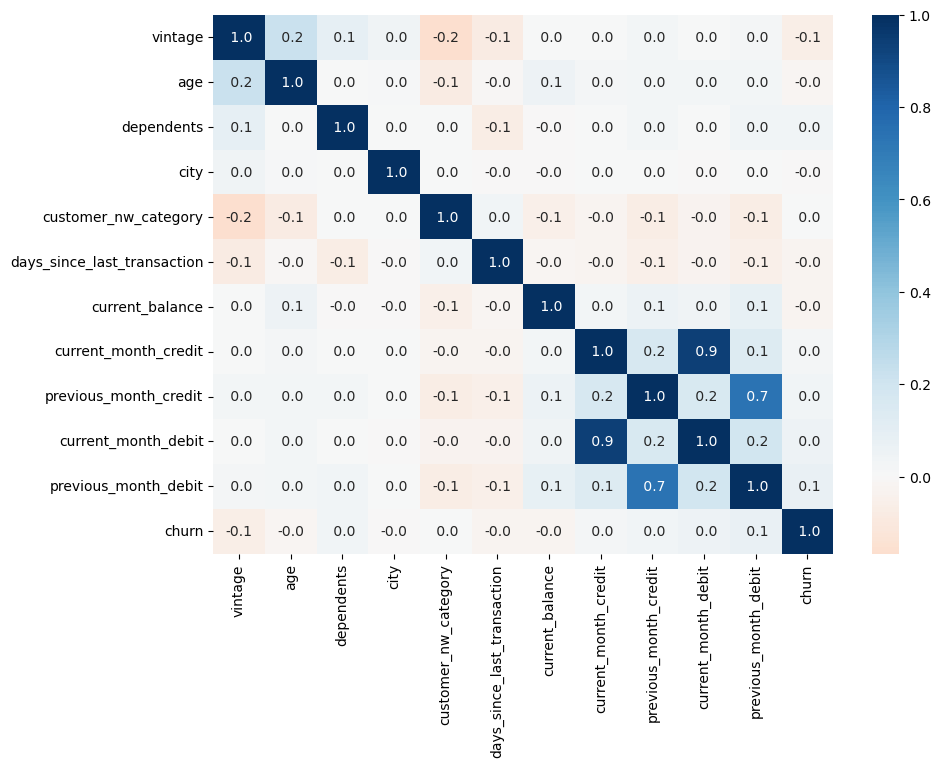

In [52]:
# dropping some columns that were highly correcated to other columns and building another correlations heatmap
churn_data=churn_data.drop('average_monthly_balance_prevQ',axis=1)
churn_data=churn_data.drop('current_month_balance',axis=1)
churn_data=churn_data.drop('previous_month_end_balance',axis=1)
churn_data=churn_data.drop('previous_month_balance',axis=1)
churn_data=churn_data.drop('average_monthly_balance_prevQ2',axis=1)
corr_d= churn_data.drop('churn',axis=1)
corr_d= churn_data.drop('city',axis=1)
corr_d= churn_data.drop('branch_code',axis=1)
corr=corr_d.corr()
fig, ax =plt.subplots()
fig.set_size_inches(10,7)
sns.heatmap(corr, annot =True, fmt =" .1f", cmap ="RdBu", center =0, ax=ax)

Text(0.5, 0.98, ' 5 BOXPLOTS ')

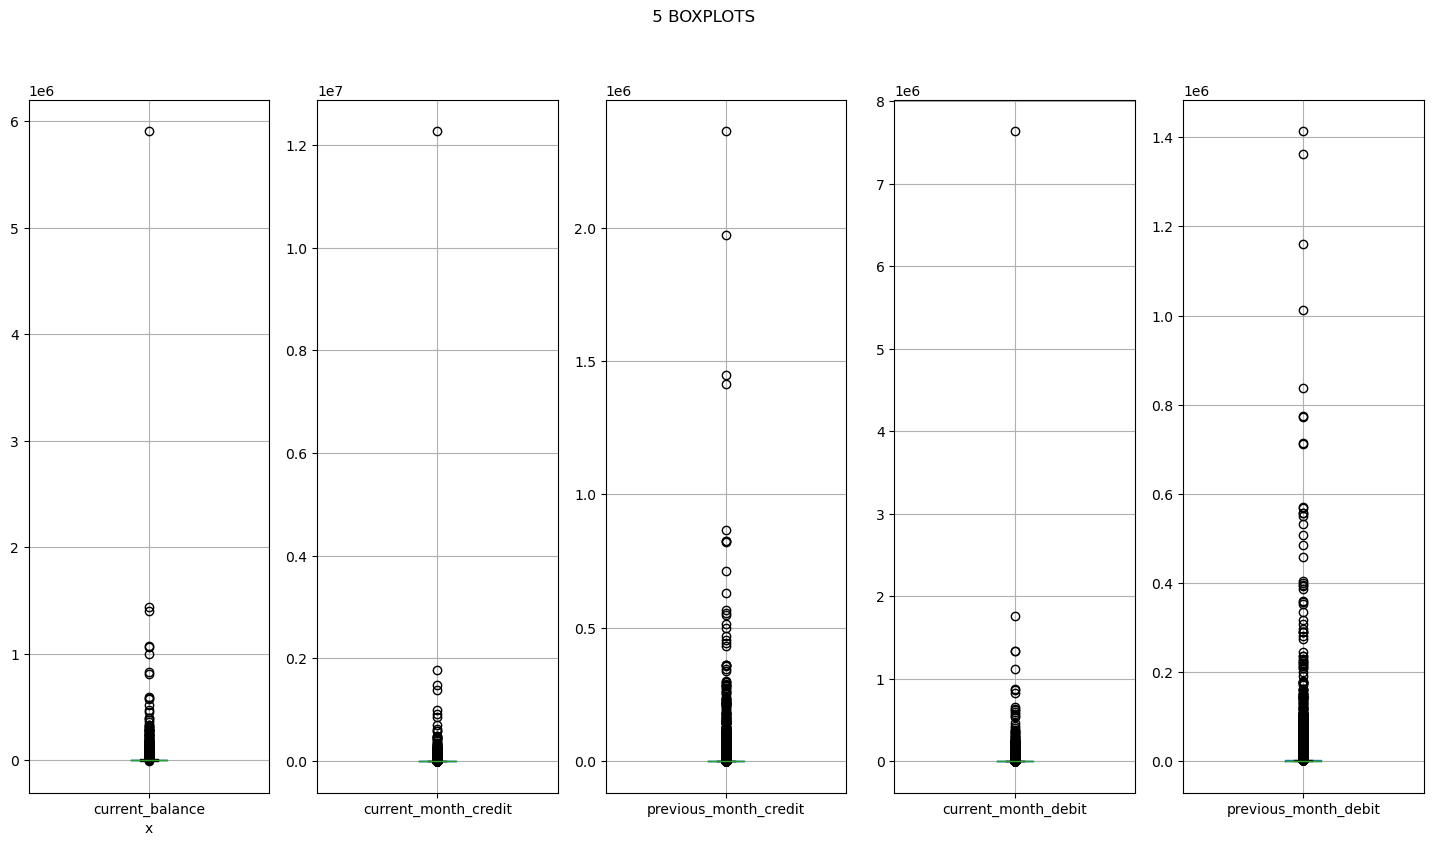

In [53]:
# side by side boxplots to visualise outliers in data
fig, axes =plt.subplots(nrows=1,ncols=5,figsize=(18,9))
churn_data.boxplot(column ='current_balance', ax =axes[0])
churn_data.boxplot(column ='current_month_credit', ax =axes[1])
churn_data.boxplot(column ='previous_month_credit', ax =axes[2])
churn_data.boxplot(column ='current_month_debit', ax =axes[3])
churn_data.boxplot(column ='previous_month_debit', ax =axes[4])
plt.suptitle(' 5 BOXPLOTS ')


<Axes: >

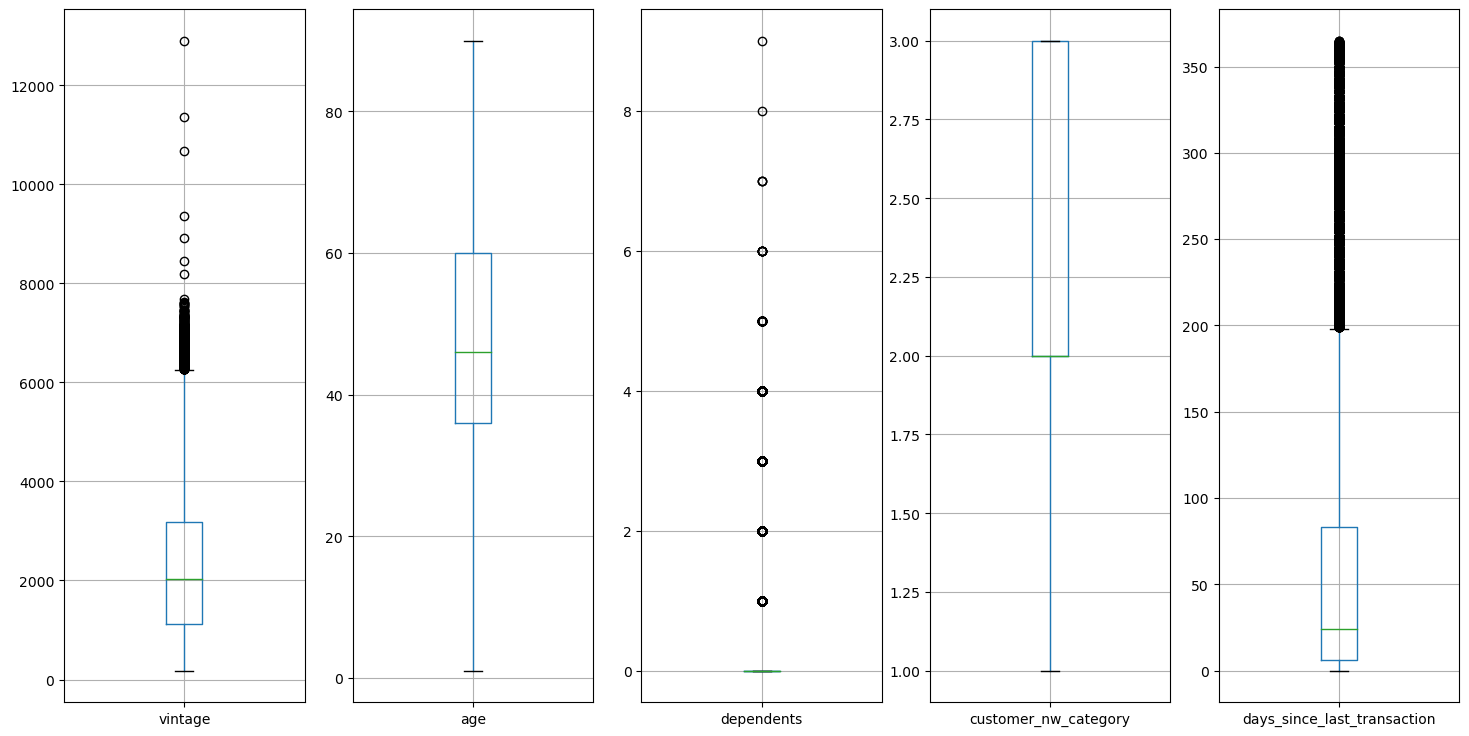

In [54]:
# side by side boxplots
fig, axes =plt.subplots(nrows=1,ncols=5,figsize=(18,9))
churn_data.boxplot(column ='vintage', ax =axes[0])
churn_data.boxplot(column ='age', ax =axes[1])
churn_data.boxplot(column ='dependents', ax =axes[2])
churn_data.boxplot(column ='customer_nw_category', ax =axes[3])
churn_data.boxplot(column ='days_since_last_transaction', ax =axes[4])


In [59]:
# dropping city column
churn_data=churn_data.drop('city',axis=1)

In [60]:
# dropping branch_code column
churn_data=churn_data.drop('branch_code',axis=1)

In [61]:
# creating dummies variables for categorical columns
churn_data = pd.get_dummies(churn_data)

In [62]:
# creating dummy variables for cutomer_nw_category column
churn_data = pd.get_dummies(churn_data, columns={'customer_nw_category'})

C:\Users\shiva\AppData\Local\Temp\ipykernel_19392\4172965283.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  churn_data = pd.get_dummies(churn_data, columns={'customer_nw_category'})


In [63]:
# creating a list of predictors
predictors=[s for s in churn_data.columns if s != 'churn']

In [65]:
# storing predictors and outcome separately 
x=pd.get_dummies(churn_data[predictors],drop_first=False)
y=churn_data['churn']

In [66]:
# splitting data into train and validation in ratio 70:30
train_x,valid_x,train_y,valid_y=train_test_split(x,y,test_size=0.3,random_state=1)

In [68]:
# Training a decision tree classifier
fullClassTree = DecisionTreeClassifier(random_state=1,max_depth= 3, min_impurity_decrease= 0, min_samples_split=10)
fullClassTree.fit(train_x, train_y)


DecisionTreeClassifier(max_depth=3, min_impurity_decrease=0,
                       min_samples_split=10, random_state=1)

In [69]:
# using classificationSummary function to see model performace on train and validation data
classificationSummary(train_y, fullClassTree.predict(train_x))
classificationSummary(valid_y, fullClassTree.predict(valid_x))

Confusion Matrix (Accuracy 0.8513)

       Prediction
Actual     0     1
     0 15552   563
     1  2387  1337
Confusion Matrix (Accuracy 0.8453)

       Prediction
Actual    0    1
     0 6703  271
     1 1044  485


In [70]:
# calculating and printing  sentivity and specificity for the decision tree model
def calculate_sensitivity_specificity(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tp = cm[1, 1]
    fp = cm[0, 1]
    fn = cm[1, 0]
    tn = cm[0, 0]
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    
    return sensitivity, specificity

valid_y_pred = fullClassTree.predict(valid_x)
sensitivity, specificity = calculate_sensitivity_specificity(valid_y, valid_y_pred)

print(f"Sensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")


Sensitivity (Recall): 0.3172
Specificity: 0.9611


In [71]:
# strong the model process and prediction for validation data
z=fullClassTree.predict(valid_x)

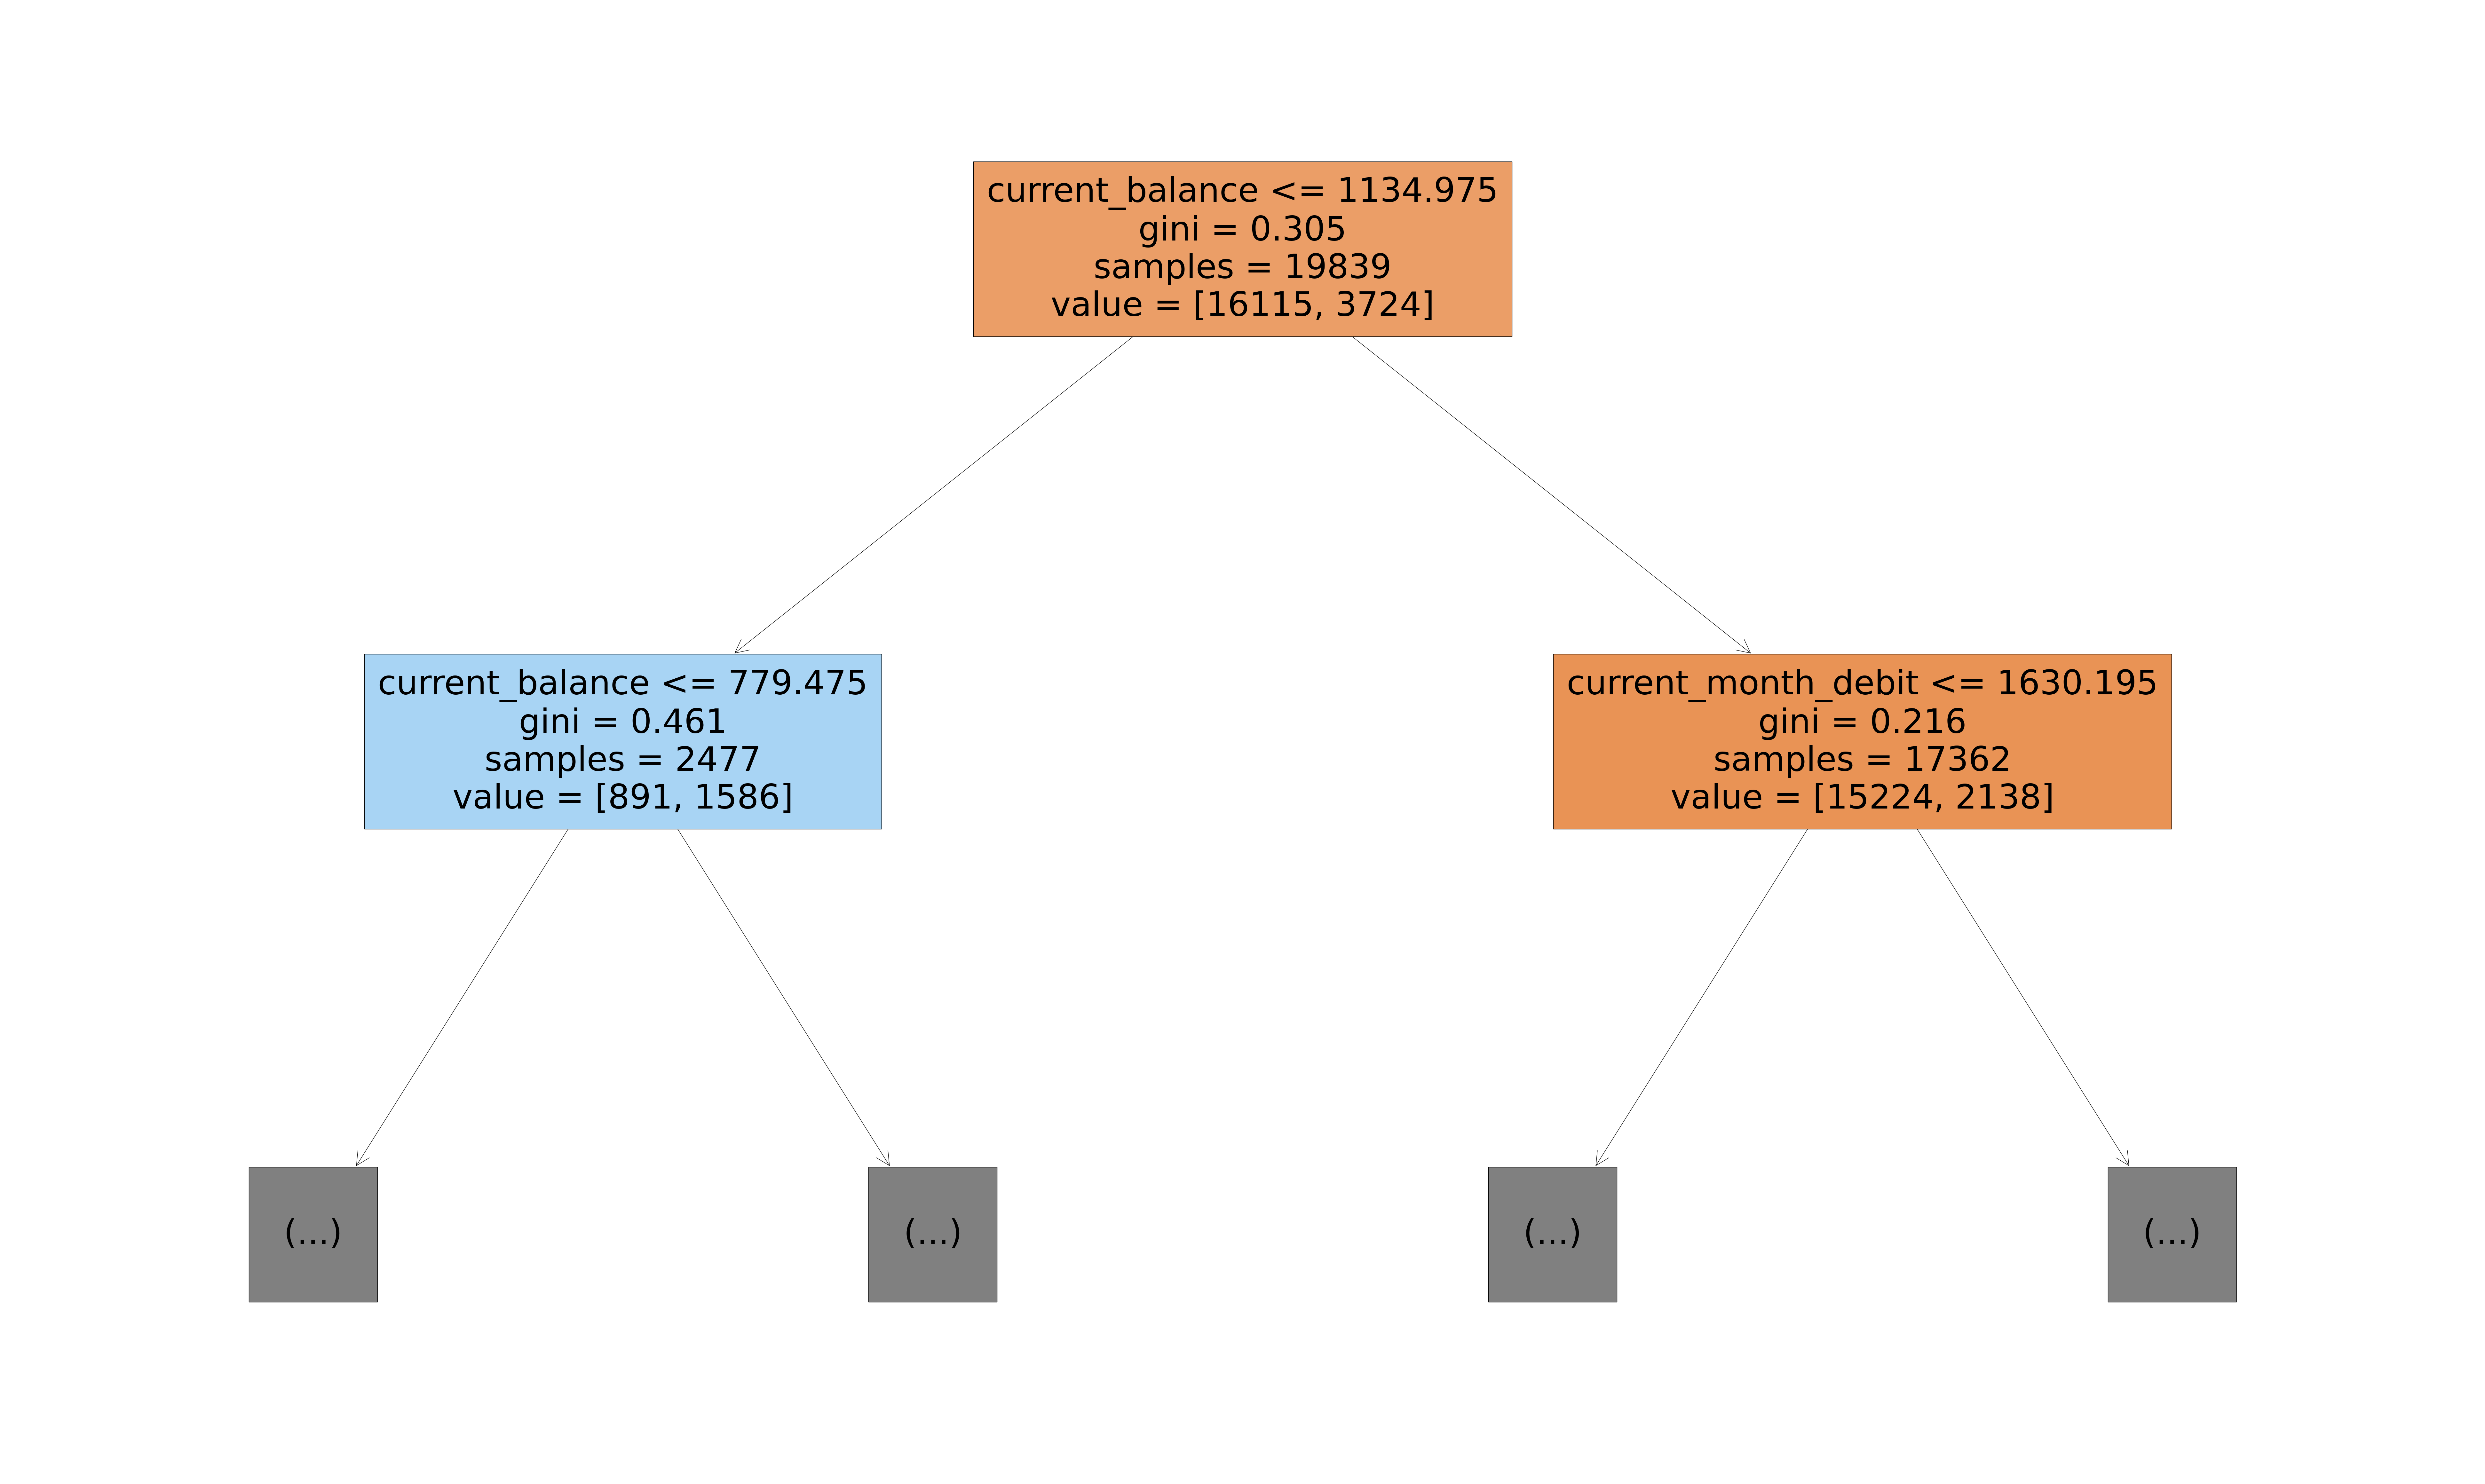

In [72]:
# Plotting the decion tree model using plot_tree function
plt.figure(figsize=(100, 60))
plot_tree(fullClassTree,feature_names=train_x.columns.tolist(),filled=True,max_depth=1,label='all')
plt.show()


In [73]:
# Finding optimal parameter values for decision tree model
# initial guess for parameters
param_grid = {
'max_depth': [10, 20, 30, 40],
'min_samples_split': [20, 40, 60, 80, 100],
'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01],
}
gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=5,
n_jobs=-1)
gridSearch.fit(churn_data[predictors], churn_data['churn'])
print('Initial score: ', gridSearch.best_score_)
print('Initial parameters: ', gridSearch.best_params_)

# Adapting param_grid based on results from initial grid search
param_grid = {
'max_depth': list(range(2, 18)), 
'min_samples_split': list(range(10, 24)), 
'min_impurity_decrease': [0,0.0009, 0.001, 0.0011], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=5,
n_jobs=-1)
gridSearch.fit(churn_data[predictors], churn_data['churn'])
print('Improved score: ', gridSearch.best_score_)
print('Improved parameters: ', gridSearch.best_params_)
bestClassTree = gridSearch.best_estimator_


Initial score:  0.8477878426829022
Initial parameters:  {'max_depth': 10, 'min_impurity_decrease': 0.001, 'min_samples_split': 20}
Improved score:  0.8478582898261952
Improved parameters:  {'max_depth': 3, 'min_impurity_decrease': 0, 'min_samples_split': 10}


                        feature  importance       std
11           occupation_company    0.000286  0.000295
12           occupation_retired    0.003581  0.001362
15           occupation_student    0.003609  0.001309
16       customer_nw_category_1    0.007719  0.001857
13          occupation_salaried    0.007971  0.002374
14     occupation_self_employed    0.008827  0.002746
10                  gender_Male    0.009080  0.002576
9                 gender_Female    0.009126  0.002600
18       customer_nw_category_3    0.010275  0.002263
17       customer_nw_category_2    0.010371  0.002249
2                    dependents    0.014631  0.003199
3   days_since_last_transaction    0.073277  0.005836
1                           age    0.073294  0.005541
5          current_month_credit    0.083514  0.006908
6         previous_month_credit    0.086132  0.007761
0                       vintage    0.093839  0.006865
8          previous_month_debit    0.113728  0.017249
7           current_month_de

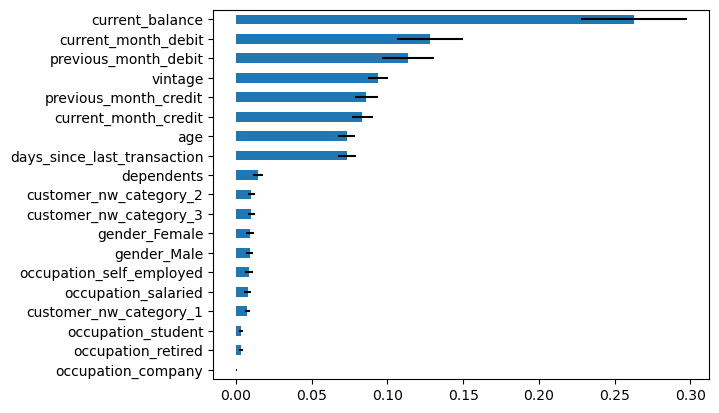

Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual     0     1
     0 16115     0
     1     0  3724
Confusion Matrix (Accuracy 0.8488)

       Prediction
Actual    0    1
     0 6673  301
     1  985  544


In [76]:
# Traing a random forest model
rf = RandomForestClassifier(n_estimators=2000, random_state=1)
rf.fit(train_x,train_y)
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
df = pd.DataFrame({'feature': churn_data[predictors].columns, 'importance': importances, 'std': std})
df = df.sort_values('importance')
print(df)
# plotting a horizontal bar graph with feature importance values
ax = df.plot(kind='barh', xerr='std', x='feature', legend=False)
ax.set_ylabel('')
plt.show()
#confusion matrix for validation set
classificationSummary(train_y, rf.predict(train_x))
classificationSummary(valid_y, rf.predict(valid_x))

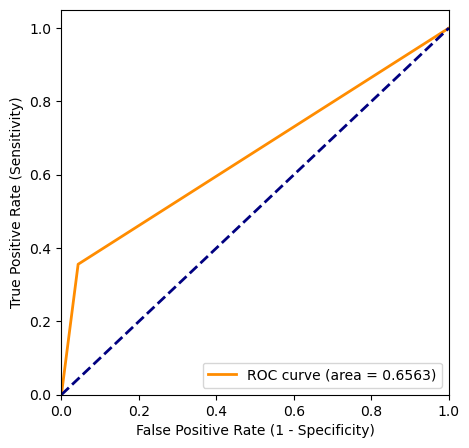

In [77]:
# compute ROC curve and AUC and building an roc curve chart
fpr, tpr, _ = roc_curve(valid_y, rf.predict(valid_x))
roc_auc = auc(fpr, tpr)
plt.figure(figsize=[5, 5])
plt.plot(fpr, tpr, color='darkorange',
lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")

In [78]:
# copying churn data to modify it so it can be used for KNN model
churn_data_Knn=churn_data

In [79]:
# changing all datatypes to int so these are no issues while caluculating euclidean distance
churn_data_Knn=churn_data_Knn.astype(int)

In [80]:
churn_data_Knn.dtypes

vintage                        int32
age                            int32
dependents                     int32
days_since_last_transaction    int32
current_balance                int32
current_month_credit           int32
previous_month_credit          int32
current_month_debit            int32
previous_month_debit           int32
churn                          int32
gender_Female                  int32
gender_Male                    int32
occupation_company             int32
occupation_retired             int32
occupation_salaried            int32
occupation_self_employed       int32
occupation_student             int32
customer_nw_category_1         int32
customer_nw_category_2         int32
customer_nw_category_3         int32
dtype: object

In [82]:
# normalizing data
scaler = preprocessing.StandardScaler()
scaler.fit(churn_data_Knn[predictors])

StandardScaler()

In [83]:
# putting normalized predictors and churn values together
churn_data_Knn = pd.concat([pd.DataFrame(scaler.transform(churn_data_Knn[predictors]),
columns=churn_data_Knn[predictors].columns),
churn_data_Knn[['churn']]], axis=1)

In [84]:
# checking for null values
churn_data_Knn.isnull().sum()

vintage                        40
age                            40
dependents                     40
days_since_last_transaction    40
current_balance                40
current_month_credit           40
previous_month_credit          40
current_month_debit            40
previous_month_debit           40
gender_Female                  40
gender_Male                    40
occupation_company             40
occupation_retired             40
occupation_salaried            40
occupation_self_employed       40
occupation_student             40
customer_nw_category_1         40
customer_nw_category_2         40
customer_nw_category_3         40
churn                          40
dtype: int64

In [85]:
# dropping remaining null values
churn_data_Knn=churn_data_Knn.dropna()

In [86]:
# manually checking data
churn_data_Knn[27800:27810]

,vintage,age,dependents,days_since_last_transaction,current_balance,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,gender_Female,gender_Male,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student,customer_nw_category_1,customer_nw_category_2,customer_nw_category_3,churn
27840,-0.290015,-0.573438,-0.388929,-0.356309,-0.148187,-0.044556,-0.076218,-0.007834,-0.094299,-0.827476,0.827476,-0.037594,-0.277613,-0.557109,0.787346,-0.280332,-0.388154,-1.026170,1.344547,0.0
27841,-1.224534,1.391452,-0.388929,-0.736217,0.085324,-0.044556,-0.109878,-0.070366,-0.137396,-0.827476,0.827476,-0.037594,-0.277613,-0.557109,0.787346,-0.280332,-0.388154,0.974498,-0.743745,0.0
27842,-1.253719,0.380937,-0.388929,2.409895,-0.090384,-0.044556,-0.109878,-0.070366,-0.137396,-0.827476,0.827476,-0.037594,-0.277613,-0.557109,0.787346,-0.280332,-0.388154,0.974498,-0.743745,0.0
27843,-0.694249,-0.012041,-0.388929,-0.736217,-0.135120,-0.044556,-0.109878,-0.070366,-0.137396,1.208494,-1.208494,-0.037594,-0.277613,-0.557109,0.787346,-0.280332,-0.388154,-1.026170,1.344547,0.0
27844,-0.934554,-0.910277,-0.388929,-0.380053,-0.075159,-0.044556,-0.079887,-0.070289,-0.119795,-0.827476,0.827476,-0.037594,-0.277613,1.794981,-1.270090,-0.280332,-0.388154,-1.026170,1.344547,1.0
27845,0.996578,-0.012041,-0.388929,-0.736217,-0.127988,-0.044556,-0.109878,-0.070366,-0.137396,-0.827476,0.827476,-0.037594,-0.277613,-0.557109,0.787346,-0.280332,-0.388154,-1.026170,1.344547,0.0
27846,-1.209632,-1.303255,-0.388929,3.122222,-0.170590,-0.044556,-0.109878,-0.070366,-0.025787,1.208494,-1.208494,-0.037594,-0.277613,-0.557109,0.787346,-0.280332,-0.388154,0.974498,-0.743745,0.0
27847,1.102138,-0.966416,-0.388929,1.638207,-0.130147,-0.044556,-0.109878,-0.066253,0.332605,-0.827476,0.827476,-0.037594,-0.277613,1.794981,-1.270090,-0.280332,2.576295,-1.026170,-0.743745,0.0
27848,2.281308,1.110753,-0.388929,0.914008,-0.128927,-0.044556,-0.109878,-0.070366,-0.137396,-0.827476,0.827476,-0.037594,3.602131,-0.557109,-1.270090,-0.280332,2.576295,-1.026170,-0.743745,1.0
27849,-0.753860,2.065128,-0.388929,-0.522519,-0.150274,-0.043636,0.177544,-0.070366,0.200598,1.208494,-1.208494,-0.037594,-0.277613,-0.557109,0.787346,-0.280332,-0.388154,-1.026170,1.344547,0.0


In [87]:
# splitting data into train and test in the ratio 70 to 30
trainData, validData = train_test_split(churn_data_Knn, test_size=0.3, random_state=1)

In [88]:
# separating predictors and outcome
train_X = trainData[predictors]
train_Y = trainData['churn']
valid_X = validData[predictors]
valid_Y = validData['churn']

In [89]:
# checking the number of records in train data
train_X.shape

(19811, 19)

In [90]:
# Traing a KNN model for different K values
# Converting to NumPy arrays
train_X = np.ascontiguousarray(np.array(train_X))
train_Y = np.ascontiguousarray(np.array(train_Y, dtype=str))
valid_X = np.ascontiguousarray(np.array(valid_X))
valid_Y = np.ascontiguousarray(np.array(valid_Y, dtype=str))

# Training a KNN classifier for different values of K
results = []
for k in range(1, 28):
    knn = KNeighborsClassifier(n_neighbors=k).fit(train_X, train_Y)
    accuracy = accuracy_score(valid_Y, knn.predict(valid_X))
    results.append({'k': k, 'accuracy': accuracy})

results_df = pd.DataFrame(results)
print(results_df)

     k  accuracy
0    1  0.698033
1    2  0.793193
2    3  0.759628
3    4  0.803321
4    5  0.785655
5    6  0.808739
6    7  0.799435
7    8  0.812625
8    9  0.809328
9   10  0.814509
10  11  0.812390
11  12  0.814745
12  13  0.813450
13  14  0.816041
14  15  0.814509
15  16  0.815687
16  17  0.815098
17  18  0.816747
18  19  0.816276
19  20  0.816983
20  21  0.816747
21  22  0.817336
22  23  0.817100
23  24  0.817336
24  25  0.816983
25  26  0.817336
26  27  0.817218


<Axes: xlabel='k'>

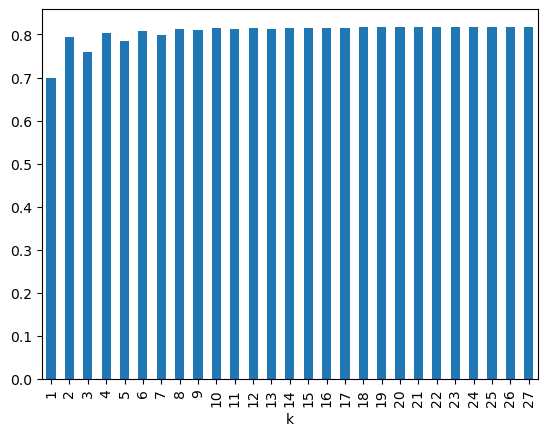

In [91]:
# bar chart showing KNN model accuracy for different K values
results_df.plot(x='k', y='accuracy', kind='bar', legend=False)

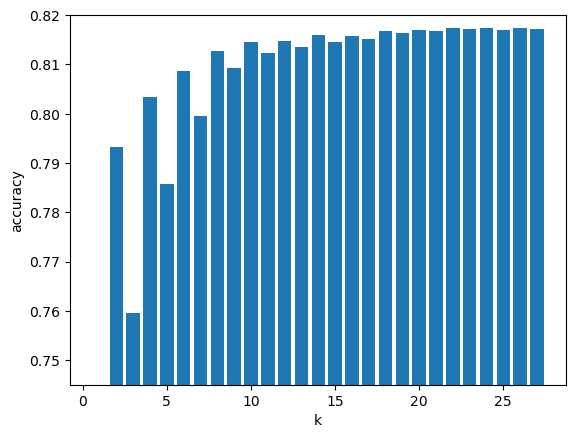

In [92]:
# Rescaling the bar chart
plt.bar(results_df['k'], results_df['accuracy'])
plt.ylim(0.745,0.82)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.show()

In [93]:
## Logistic Regression

In [94]:
!pip install mord

In [96]:
# making adjustmenst in processed data to drop one dummy variable each created from categorical columns
# to avoid multicollinearity issues
train_x_LR =train_x.drop('gender_Female',axis=1)
valid_x_LR =valid_x.drop('gender_Female',axis=1)
train_x_LR=train_x_LR.drop('occupation_company',axis=1)
valid_x_LR=valid_x_LR.drop('occupation_company',axis=1)
train_x_LR=train_x_LR.drop('customer_nw_category_1',axis=1)
valid_x_LR=valid_x_LR.drop('customer_nw_category_1',axis=1)

In [99]:
train_y_LR=train_y
valid_y_LR=valid_y

In [100]:
# fitting  a logistic regression model
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(train_x_LR, train_y_LR)


LogisticRegression(C=1e+42, solver='liblinear')

In [101]:
# printing intercepts and AIC score calculated by logistic regression model
print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=train_x_LR.columns).transpose())
print('\nAIC', AIC_score(valid_y, logit_reg.predict(valid_x_LR), df = len(train_x_LR.columns) + 1))

intercept  -0.0004619464412297503
        vintage       age  dependents  days_since_last_transaction  \
coeff -0.000195 -0.014887    0.000036                    -0.002019   

       current_balance  current_month_credit  previous_month_credit  \
coeff        -0.000038             -0.000013              -0.000007   

       current_month_debit  previous_month_debit  gender_Male  \
coeff             0.000021              0.000019    -0.000204   

       occupation_retired  occupation_salaried  occupation_self_employed  \
coeff           -0.000034            -0.000133                 -0.000165   

       occupation_student  customer_nw_category_2  customer_nw_category_3  
coeff           -0.000128               -0.000246                -0.00022  

AIC 9537.960359134397


In [103]:
# training confusion matrix
classificationSummary(train_y_LR, logit_reg.predict(train_x_LR))
# validation confusion matrix
classificationSummary(valid_y_LR, logit_reg.predict(valid_x_LR))

Confusion Matrix (Accuracy 0.8128)

       Prediction
Actual     0     1
     0 16043    72
     1  3642    82
Confusion Matrix (Accuracy 0.8210)

       Prediction
Actual    0    1
     0 6952   22
     1 1500   29


In [104]:
# predictind outcomes for validation data
logit_reg_pred = logit_reg.predict(valid_x_LR)
logit_reg_proba = logit_reg.predict_proba(valid_x_LR)


In [107]:
# storing model results in a dataframe
logit_result = pd.DataFrame({'actual': valid_y_LR,
'p(0)': [p[0] for p in logit_reg_proba],
'p(1)': [p[1] for p in logit_reg_proba],
'predicted': logit_reg_pred })

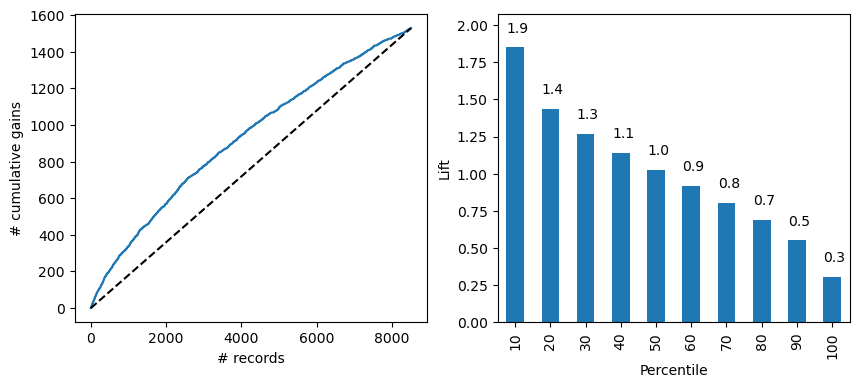

In [108]:
# creating gains and lift charts for logistic regression model
df = logit_result.sort_values(by=['p(1)'], ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
gainsChart(df.actual, ax=axes[0])
liftChart(df['p(1)'], title=False, ax=axes[1])
plt.show()